In [329]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [330]:
df= pd.read_csv("games.csv")


In [331]:
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [333]:
df.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


In [334]:
df.corr(numeric_only=True)

,rated,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
rated,1.000000,-0.001171,-0.001176,0.090698,0.003284,0.032655,-0.001906
created_at,-0.001171,1.000000,1.000000,0.083185,0.116170,0.133316,0.100201
last_move_at,-0.001176,1.000000,1.000000,0.083196,0.116172,0.133318,0.100203
turns,0.090698,0.083185,0.083196,1.000000,0.129753,0.160467,0.055999
white_rating,0.003284,0.116170,0.116172,0.129753,1.000000,0.634171,0.277379
black_rating,0.032655,0.133316,0.133318,0.160467,0.634171,1.000000,0.255396
opening_ply,-0.001906,0.100201,0.100203,0.055999,0.277379,0.255396,1.000000


# data preprocessing

In [335]:
df.isnull().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

No null values in the data 

In [336]:
df.duplicated().sum()

429

In [337]:
df[df.duplicated(keep=False)]

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
120,XRuQPSzH,True,1.503580e+12,1.503580e+12,50,resign,black,10+0,chess-brahs,2036,cdvh,1706,Nf3 d5 g3 c5 Bg2 Nc6 d3 Nf6 O-O e5 Nc3 d4 Ne4 ...,A08,King's Indian Attack: French Variation,6
950,XRuQPSzH,True,1.503580e+12,1.503580e+12,50,resign,black,10+0,chess-brahs,2036,cdvh,1706,Nf3 d5 g3 c5 Bg2 Nc6 d3 Nf6 O-O e5 Nc3 d4 Ne4 ...,A08,King's Indian Attack: French Variation,6
1443,x1Svcl0P,True,1.499820e+12,1.499830e+12,59,mate,white,10+0,kachess10204542,1171,quantummequanic,1432,c4 e5 Nc3 Nf6 Nf3 Nc6 g3 d5 cxd5 Nxd5 Bg2 Be6 ...,A29,English Opening: King's English Variation | F...,7
1794,x1Svcl0P,True,1.499820e+12,1.499830e+12,59,mate,white,10+0,kachess10204542,1171,quantummequanic,1432,c4 e5 Nc3 Nf6 Nf3 Nc6 g3 d5 cxd5 Nxd5 Bg2 Be6 ...,A29,English Opening: King's English Variation | F...,7
1795,wgIHzqDo,True,1.499710e+12,1.499710e+12,113,mate,white,10+0,quantummequanic,1403,barrow-wight,1364,e4 e6 e5 Bc5 d4 Be7 c3 Nh6 Bxh6 gxh6 Qd2 Bg5 f...,C00,French Defense: Steinitz Attack,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20013,Uk0pZCRR,True,1.499532e+12,1.499541e+12,95,resign,black,45+45,kferapont,2094,moistvonlipwig,2228,e4 e5 Nf3 Nc6 Bb5 g6 d4 exd4 Bxc6 dxc6 Qxd4 Qx...,C60,Ruy Lopez: Fianchetto Defense,6
20014,ZhZm1ol9,True,1.498871e+12,1.498879e+12,109,draw,draw,45+45,moistvonlipwig,2229,mn8,2220,e4 e5 Nf3 Nc6 Bc4 Bc5 c3 Nf6 d4 exd4 cxd4 Bb4+...,C54,Italian Game: Classical Variation | Greco Gam...,17
20015,fpqjttDx,True,1.497663e+12,1.497664e+12,42,resign,black,7+30,waltersafarian,2162,moistvonlipwig,2214,d4 Nf6 c4 e6 Nf3 Bb4+ Bd2 a5 e3 O-O Bd3 b6 O-O...,E11,Bogo-Indian Defense: Wade-Smyslov Variation,8
20016,lzPgCJCS,True,1.497660e+12,1.497663e+12,102,resign,black,7+30,moistvonlipwig,2236,waltersafarian,2148,e4 g6 Nc3 Bg7 f4 c6 g3 d6 Bg2 e5 fxe5 dxe5 d3 ...,B06,Modern Defense,2


We need to remove the duplicate values from the dataset

In [338]:
df= df.drop_duplicates()
df.shape

(19629, 16)

In [339]:
df = df.loc[df["turns"]>2]
df.shape

(19429, 16)

In [340]:
df['created_at_dt'] = pd.to_datetime(df['created_at']/1000,unit='s',origin='unix')
df['last_move_at_dt'] = pd.to_datetime(df['last_move_at']/1000,unit='s',origin="unix")
df['game_len_dt'] = df['last_move_at_dt'] - df['created_at_dt']
df['game_len'] = df['last_move_at'] - df['created_at']
df['game_len_mins'] = df['game_len'].apply(lambda x: round(x / 1000 / 60, 2))

In [341]:
df

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,...,black_rating,moves,opening_eco,opening_name,opening_ply,created_at_dt,last_move_at_dt,game_len_dt,game_len,game_len_mins
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,...,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,2017-08-31 20:06:40.000000000,2017-08-31 20:06:40.000000000,0 days 00:00:00,0.0,0.00
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,...,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,2017-08-30 21:53:20.000000000,2017-08-30 21:53:20.000000000,0 days 00:00:00,0.0,0.00
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,...,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,2017-08-30 21:53:20.000000000,2017-08-30 21:53:20.000000000,0 days 00:00:00,0.0,0.00
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,...,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,2017-08-30 16:20:00.000000000,2017-08-30 16:20:00.000000000,0 days 00:00:00,0.0,0.00
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,...,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,2017-08-29 18:06:40.000000000,2017-08-29 18:06:40.000000000,0 days 00:00:00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,...,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2,2017-07-11 16:35:14.342000128,2017-07-11 16:40:36.076000000,0 days 00:05:21.733999872,321734.0,5.36
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,...,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2,2017-07-10 14:48:09.760000000,2017-07-10 15:00:33.979000064,0 days 00:12:24.219000064,744219.0,12.40
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,...,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3,2017-07-10 14:44:37.492999936,2017-07-10 14:47:30.326999808,0 days 00:02:52.833999872,172834.0,2.88
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,...,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4,2017-07-10 14:15:27.019000064,2017-07-10 14:31:13.717999872,0 days 00:15:46.698999808,946699.0,15.78


In [342]:
df.game_len_mins.value_counts()

0.00      8494
166.67     729
5.27        14
8.02        12
14.89       12
          ... 
36.61        1
22.38        1
85.85        1
31.26        1
67.37        1
Name: game_len_mins, Length: 3242, dtype: int64

In [343]:
df.white_id.value_counts()

bleda            48
ssf7             48
hassan1365416    44
khelil           41
anakgreget       38
                 ..
psilosimon        1
mrbond            1
gw22              1
shiftas           1
marcodisogno      1
Name: white_id, Length: 9390, dtype: int64

In [344]:
df.black_id.value_counts()

king5891        44
docboss         44
ducksandcats    41
saviter         38
taranga         38
                ..
grooveman        1
lpardo           1
stiffypawn       1
piggy1122        1
ffbob            1
Name: black_id, Length: 9278, dtype: int64

In [345]:
df.id.value_counts()

Xxjp58Do    2
7O6Uuh0i    2
9zedLmir    2
H7E4hWqv    2
jtJwv4Nf    2
           ..
tw1aA68C    1
Mh4x45AH    1
TWUjhfpR    1
DXnBPHr6    1
N8G2JHGG    1
Name: id, Length: 18919, dtype: int64

In [346]:
check_df=df[df["id"]=="Xxjp58Do"]
check_df

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,...,black_rating,moves,opening_eco,opening_name,opening_ply,created_at_dt,last_move_at_dt,game_len_dt,game_len,game_len_mins
6859,Xxjp58Do,True,1.498990e+12,1.498990e+12,51,outoftime,white,10+0,maciek1959,1542,...,1659,c4 e5 Nc3 Nc6 g3 Nf6 Bg2 Bc5 e3 d6 Nge2 Bd7 d4...,A25,English Opening: King's English Variation | R...,4,2017-07-02 10:06:40.000,2017-07-02 10:06:40.000,0 days 00:00:00,0.0,0.0
18605,Xxjp58Do,True,1.498991e+12,1.498992e+12,51,outoftime,white,10+0,maciek1959,1542,...,1659,c4 e5 Nc3 Nc6 g3 Nf6 Bg2 Bc5 e3 d6 Nge2 Bd7 d4...,A25,English Opening: King's English Variation | R...,4,2017-07-02 10:26:21.760,2017-07-02 10:40:09.684,0 days 00:13:47.924000,827924.0,13.8


In [347]:
df.drop_duplicates("id", keep="last", inplace= True)

In [348]:
df

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,...,black_rating,moves,opening_eco,opening_name,opening_ply,created_at_dt,last_move_at_dt,game_len_dt,game_len,game_len_mins
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,...,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,2017-08-31 20:06:40.000000000,2017-08-31 20:06:40.000000000,0 days 00:00:00,0.0,0.00
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,...,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,2017-08-30 21:53:20.000000000,2017-08-30 21:53:20.000000000,0 days 00:00:00,0.0,0.00
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,...,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,2017-08-30 21:53:20.000000000,2017-08-30 21:53:20.000000000,0 days 00:00:00,0.0,0.00
5,MsoDV9wj,False,1.504240e+12,1.504240e+12,5,draw,draw,10+0,trelynn17,1250,...,1002,e4 c5 Nf3 Qa5 a3,B27,Sicilian Defense: Mongoose Variation,4,2017-09-01 04:26:40.000000000,2017-09-01 04:26:40.000000000,0 days 00:00:00,0.0,0.00
6,qwU9rasv,True,1.504230e+12,1.504230e+12,33,resign,white,10+0,capa_jr,1520,...,1423,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,10,2017-09-01 01:40:00.000000000,2017-09-01 01:40:00.000000000,0 days 00:00:00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,...,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2,2017-07-11 16:35:14.342000128,2017-07-11 16:40:36.076000000,0 days 00:05:21.733999872,321734.0,5.36
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,...,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2,2017-07-10 14:48:09.760000000,2017-07-10 15:00:33.979000064,0 days 00:12:24.219000064,744219.0,12.40
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,...,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3,2017-07-10 14:44:37.492999936,2017-07-10 14:47:30.326999808,0 days 00:02:52.833999872,172834.0,2.88
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,...,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4,2017-07-10 14:15:27.019000064,2017-07-10 14:31:13.717999872,0 days 00:15:46.698999808,946699.0,15.78


In [349]:
filtered_df=df[df.game_len_mins ==0]
filtered_df.shape

(8024, 21)

<Axes: ylabel='game_len_mins'>

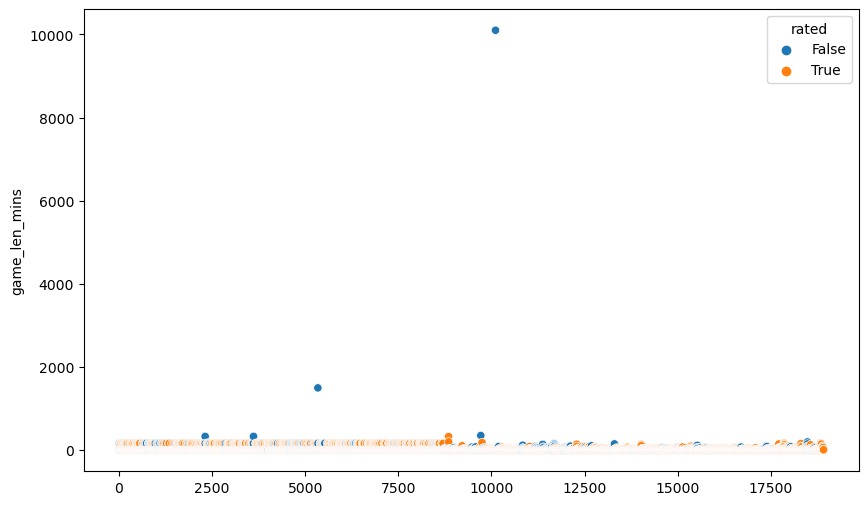

In [350]:
sns.scatterplot(x=range(len(df)),y="game_len_mins",hue="rated",data= df)

In [351]:
#rating range
level_list=[]
group_list=[]
def level_creator(rating):
    level=str()
    if rating<900:
        level="rookie"
        
    elif 900<=rating<1200:
        level="beginner"
    elif 1200<=rating<1800:
        level="intermediate"
    elif 1800<=rating<2300:
        level="advance"
    else:
        level= "grandmaster"
    level_list.append(level)

In [352]:
df["white_rating"].map(level_creator)
df["white_level"]=level_list

level_list=[]   

df["black_rating"].map(level_creator)
df["black_level"]=level_list

In [353]:
df.white_level.value_counts()

intermediate    12842
advance          4422
beginner         1425
grandmaster       194
rookie             36
Name: white_level, dtype: int64

In [354]:
df=df.drop(["created_at","last_move_at","id","white_id","black_id","created_at_dt","last_move_at_dt","game_len_dt","moves"], axis= 1)

In [355]:
#increment code
def FormatIncrementCode(inc):
        splitted = inc.split('+')
        return int(splitted[0])
    
def CategorizeTime(inc):
    if inc < 3:
        return 'bullet'
    elif inc < 9:
        return 'blitz'
    elif inc < 16:
        return 'rapid'
    else:
        return 'classical'

In [356]:
df["rating_diff"] = df["white_rating"]-df["black_rating"]
# df["rating_diff"] = df["rating_diff"].apply(abs)

In [357]:
df['increment_code'] = np.vectorize(FormatIncrementCode)(df['increment_code'])
df['increment_code'].head()

0    15
1     5
2     5
5    10
6    10
Name: increment_code, dtype: int32

In [358]:
filtered_df = pd.get_dummies(df, columns=['winner',"victory_status","rated"])

In [359]:
df

,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_name,opening_ply,game_len,game_len_mins,white_level,black_level,rating_diff
0,False,13,outoftime,white,15,1500,1191,D10,Slav Defense: Exchange Variation,5,0.0,0.00,intermediate,beginner,309
1,True,16,resign,black,5,1322,1261,B00,Nimzowitsch Defense: Kennedy Variation,4,0.0,0.00,intermediate,intermediate,61
2,True,61,mate,white,5,1496,1500,C20,King's Pawn Game: Leonardis Variation,3,0.0,0.00,intermediate,intermediate,-4
5,False,5,draw,draw,10,1250,1002,B27,Sicilian Defense: Mongoose Variation,4,0.0,0.00,intermediate,beginner,248
6,True,33,resign,white,10,1520,1423,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,10,0.0,0.00,intermediate,intermediate,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,True,24,resign,white,10,1691,1220,A80,Dutch Defense,2,321734.0,5.36,intermediate,intermediate,471
20054,True,82,mate,black,10,1233,1196,A41,Queen's Pawn,2,744219.0,12.40,intermediate,beginner,37
20055,True,35,mate,white,10,1219,1286,D00,Queen's Pawn Game: Mason Attack,3,172834.0,2.88,intermediate,intermediate,-67
20056,True,109,resign,white,10,1360,1227,B07,Pirc Defense,4,946699.0,15.78,intermediate,intermediate,133


In [360]:
wlist=[]
def winner_check(data):
    winner_str=str()
    if (data["white_rating"] < data["black_rating"] and (data["winner"]=="white" or data["winner"]=="draw")) :
        winner_str="lower rating"
    else:
        winner_str="higher rating"
    
    if (data["black_rating"] < data["white_rating"] and (data["winner"]=="black" or data["winner"]=="draw")):
        winner_str="lower rating"
    else:
        winner_str="higher rating"
        
    wlist.append(winner_str)
    
df.apply(winner_check,axis=1) # use apply to interact with dataset you can use other functions

0        None
1        None
2        None
5        None
6        None
         ... 
20053    None
20054    None
20055    None
20056    None
20057    None
Length: 18919, dtype: object

In [361]:
df["rating_adv"]=wlist

In [362]:
df

,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_name,opening_ply,game_len,game_len_mins,white_level,black_level,rating_diff,rating_adv
0,False,13,outoftime,white,15,1500,1191,D10,Slav Defense: Exchange Variation,5,0.0,0.00,intermediate,beginner,309,higher rating
1,True,16,resign,black,5,1322,1261,B00,Nimzowitsch Defense: Kennedy Variation,4,0.0,0.00,intermediate,intermediate,61,lower rating
2,True,61,mate,white,5,1496,1500,C20,King's Pawn Game: Leonardis Variation,3,0.0,0.00,intermediate,intermediate,-4,higher rating
5,False,5,draw,draw,10,1250,1002,B27,Sicilian Defense: Mongoose Variation,4,0.0,0.00,intermediate,beginner,248,lower rating
6,True,33,resign,white,10,1520,1423,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,10,0.0,0.00,intermediate,intermediate,97,higher rating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,True,24,resign,white,10,1691,1220,A80,Dutch Defense,2,321734.0,5.36,intermediate,intermediate,471,higher rating
20054,True,82,mate,black,10,1233,1196,A41,Queen's Pawn,2,744219.0,12.40,intermediate,beginner,37,lower rating
20055,True,35,mate,white,10,1219,1286,D00,Queen's Pawn Game: Mason Attack,3,172834.0,2.88,intermediate,intermediate,-67,higher rating
20056,True,109,resign,white,10,1360,1227,B07,Pirc Defense,4,946699.0,15.78,intermediate,intermediate,133,higher rating


In [363]:
df["rating_diff"].describe()

count    18919.000000
mean         7.224325
std        244.838985
min      -1605.000000
25%       -107.000000
50%          3.000000
75%        121.000000
max       1499.000000
Name: rating_diff, dtype: float64

# Analysis

In [364]:
df.describe()

,turns,increment_code,white_rating,black_rating,opening_ply,game_len,game_len_mins,rating_diff
count,18919.000000,18919.000000,18919.000000,18919.000000,18919.000000,1.891900e+04,18919.000000,18919.000000
mean,61.114752,13.640573,1598.869338,1591.645013,4.848248,8.694577e+05,14.491051,7.224325
std,33.126817,16.290302,288.075364,289.044093,2.793652,4.861006e+06,81.016992,244.838985
min,3.000000,0.000000,784.000000,789.000000,1.000000,0.000000e+00,0.000000,-1605.000000
25%,38.000000,10.000000,1403.500000,1397.000000,3.000000,0.000000e+00,0.000000,-107.000000
50%,56.000000,10.000000,1568.000000,1564.000000,4.000000,2.636360e+05,4.390000,3.000000
75%,79.000000,15.000000,1793.000000,1786.000000,6.000000,8.042320e+05,13.405000,121.000000
max,349.000000,180.000000,2700.000000,2621.000000,28.000000,6.058447e+08,10097.410000,1499.000000


In [365]:
df.corr(numeric_only=True)

,rated,turns,increment_code,white_rating,black_rating,opening_ply,game_len,game_len_mins,rating_diff
rated,1.000000,0.089699,-0.112262,0.007951,0.030197,-0.008868,-0.027452,-0.027452,-0.026294
turns,0.089699,1.000000,-0.046162,0.125361,0.154221,0.034635,0.061528,0.061528,-0.034567
increment_code,-0.112262,-0.046162,1.000000,-0.058698,-0.072215,-0.022129,0.113948,0.113948,0.016190
white_rating,0.007951,0.125361,-0.058698,1.000000,0.640040,0.278307,0.009439,0.009439,0.420993
black_rating,0.030197,0.154221,-0.072215,0.640040,1.000000,0.253972,0.007202,0.007202,-0.427482
opening_ply,-0.008868,0.034635,-0.022129,0.278307,0.253972,1.000000,0.008045,0.008045,0.027627
game_len,-0.027452,0.061528,0.113948,0.009439,0.007202,0.008045,1.000000,1.000000,0.002604
game_len_mins,-0.027452,0.061528,0.113948,0.009439,0.007202,0.008045,1.000000,1.000000,0.002603
rating_diff,-0.026294,-0.034567,0.016190,0.420993,-0.427482,0.027627,0.002604,0.002603,1.000000


<Axes: >

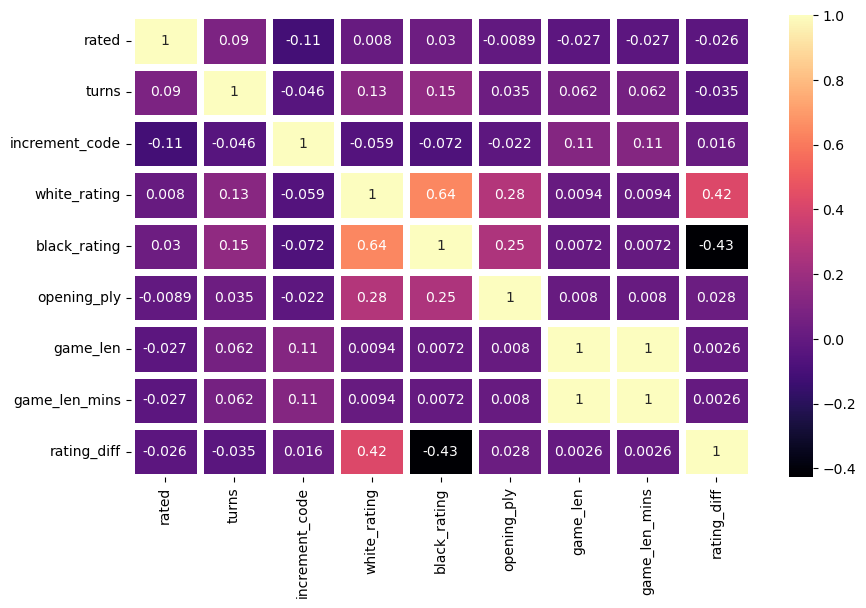

In [366]:
sns.heatmap(df.corr(numeric_only=True), cmap="magma",annot=True,linewidth=5 )

In [404]:
pal = sns.color_palette("rocket")
pal.as_hex()


['#35193e', '#701f57', '#ad1759', '#e13342', '#f37651', '#f6b48f']

In [410]:
pal = sns.color_palette("rocket")
pal.as_hex()[:]

['#35193e', '#701f57', '#ad1759', '#e13342', '#f37651', '#f6b48f']

In [411]:
col="#701f57"

<Axes: xlabel='winner', ylabel='count'>

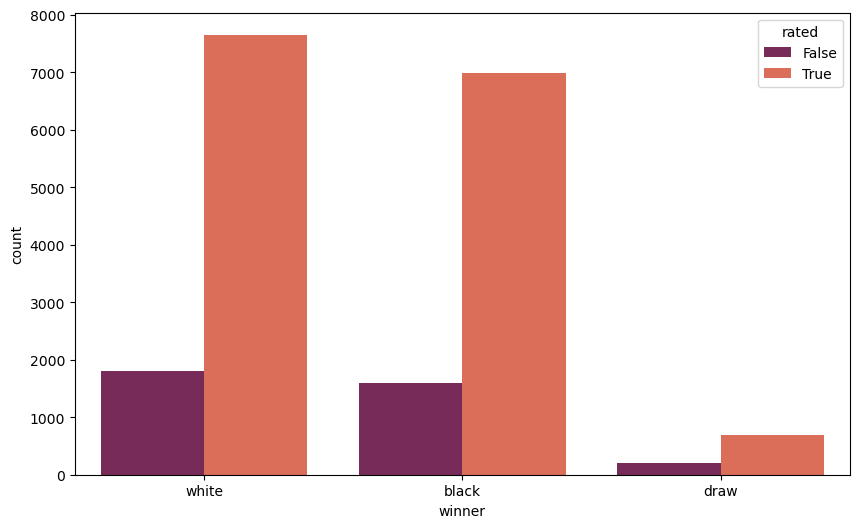

In [412]:
sns.countplot(data=df,x="winner",hue="rated", palette="rocket")

Text(0, 0.5, 'Match Count')

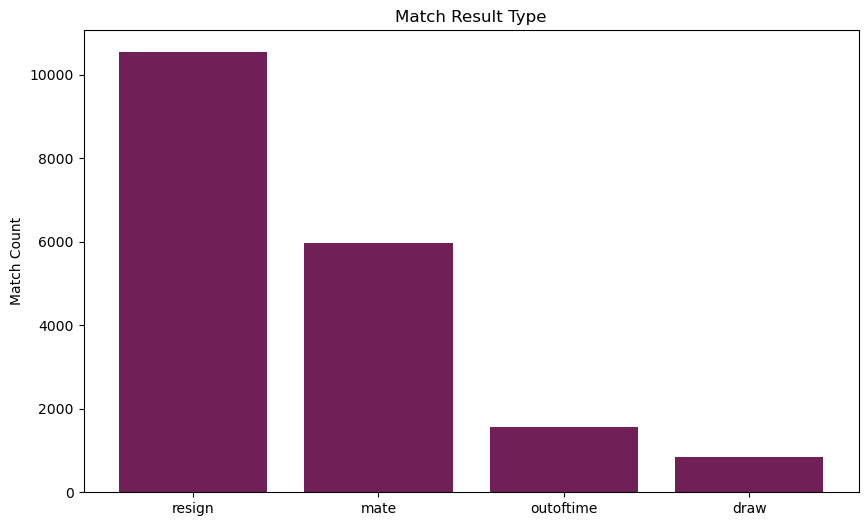

In [417]:
victory_stat=df["victory_status"].value_counts()
plt.bar(victory_stat.index,victory_stat,color=col)
plt.title("Match Result Type")
plt.ylabel("Match Count")


<Axes: xlabel='increment_code', ylabel='count'>

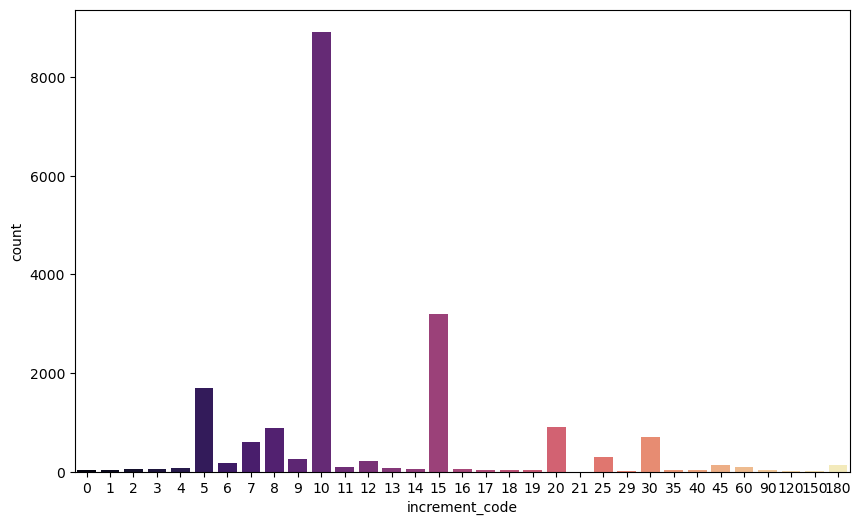

In [418]:
plt.figure(figsize=(10,6))

sns.countplot(data=df, x="increment_code",orient="h", palette="magma")

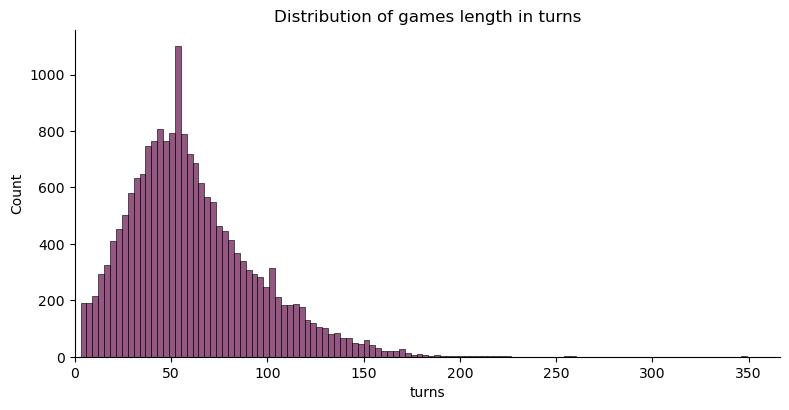

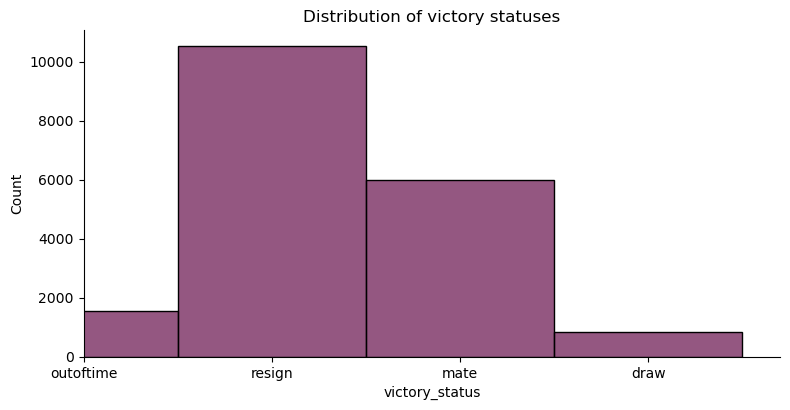

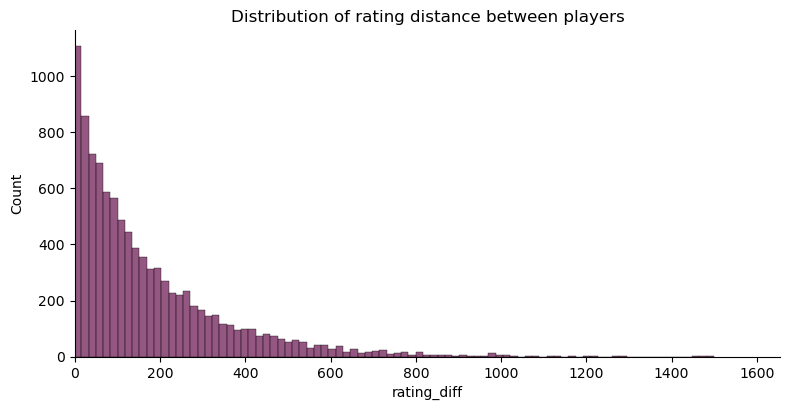

In [419]:
to_plot = [ ('turns', 'Distribution of games length in turns'), ('victory_status', 'Distribution of victory statuses'),('rating_diff', 'Distribution of rating distance between players')]

for var, title in to_plot:
    sns.displot( df[var], height=4, aspect=2, color=col)
    
    plt.title(title)
    plt.xlim((0))
    plt.ylim((0))
    
    plt.show()

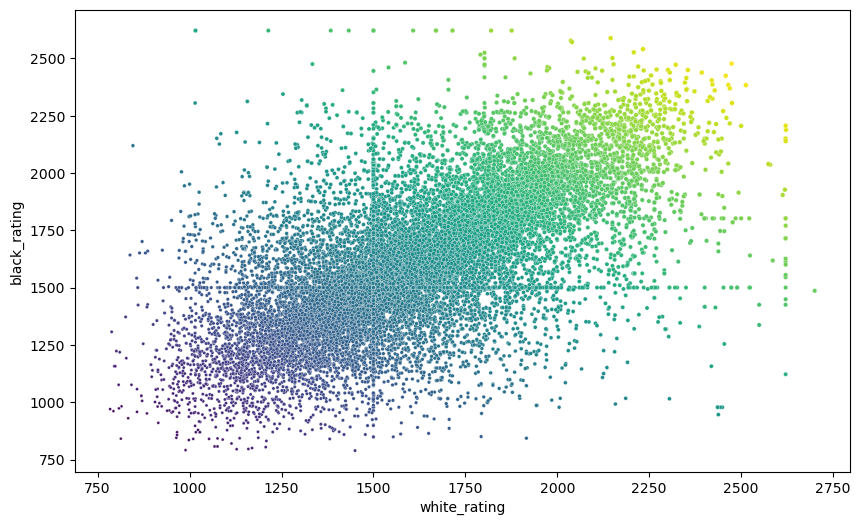

In [420]:

sns.scatterplot(x=df["white_rating"],y=df["black_rating"],s=((df["black_rating"]+df["white_rating"])//2)*0.005,c=((df["black_rating"]+df["white_rating"])//2)*0.0005) 
plt.rcParams["figure.figsize"] = (10,6) # execute this cell 2 times because it is not updating in first time

# there is an straight long line in 1500 in both side  , because starting rating is 1500 in lichess 

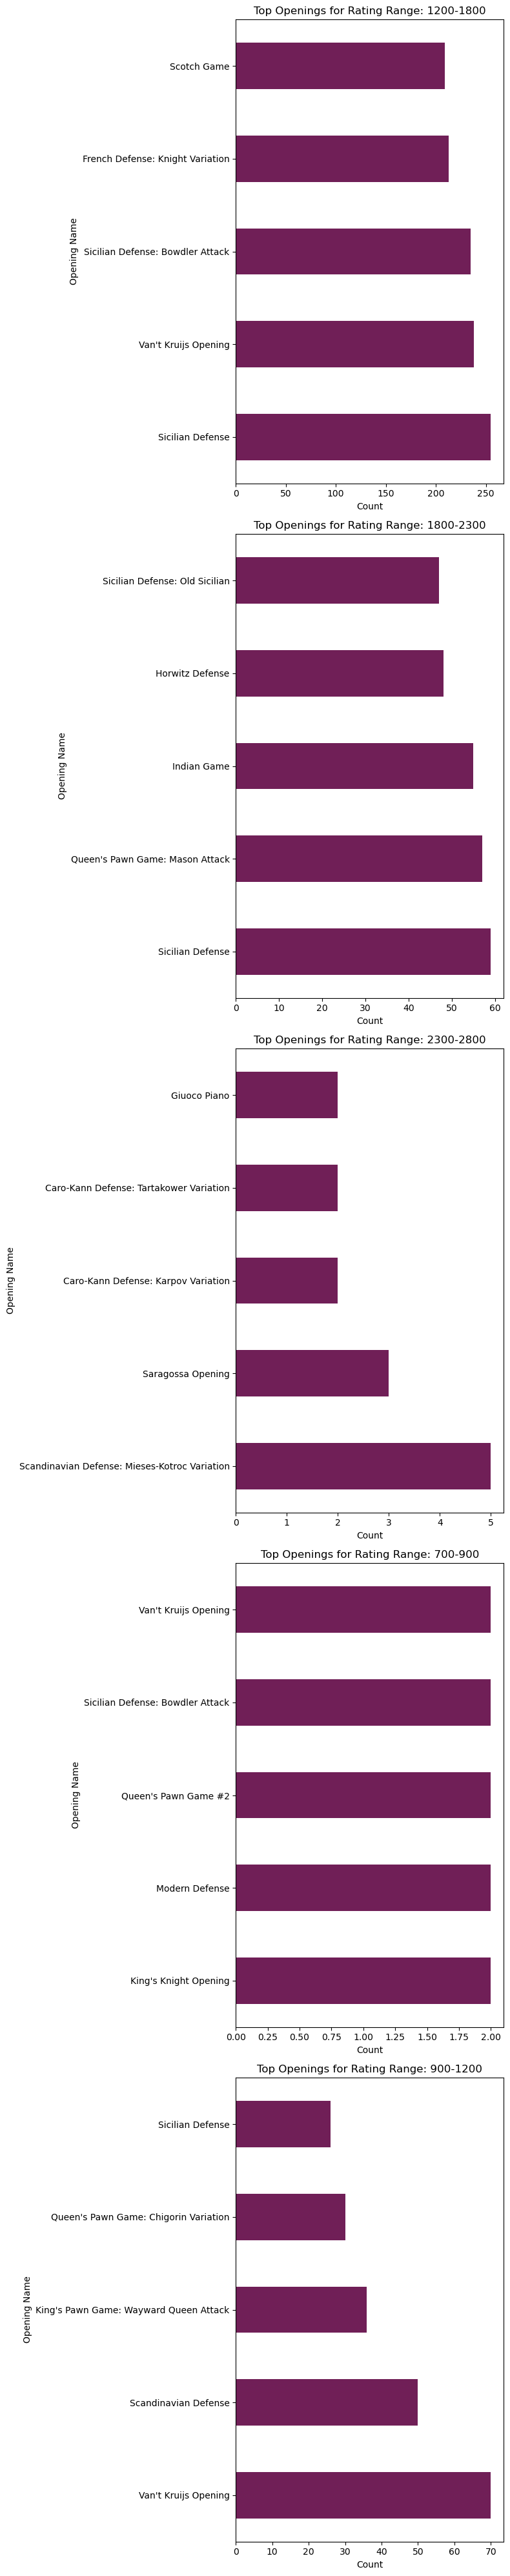

In [421]:
# Define the rating ranges
rating_ranges = [(700, 900),(900, 1200),(1200, 1800),(1800, 2300),(2300, 2800)]

# Create a function to categorize ratings into ranges
def categorize_rating(rating):
    for low, high in rating_ranges:
        if low <= rating <= high:
            return f'{low}-{high}'

# Apply the categorize_rating function to create a new column 'rating_range'
df['rating_range'] = df['white_rating'].apply(categorize_rating)

# Filter the DataFrame for the specified rating ranges
filtered_df = df[df['rating_range'].notnull()]

# Group by 'rating_range' and 'Opening Name', count occurrences, and sort
opening_counts = (df.groupby(['rating_range', 'opening_name']).size().reset_index(name='count'))



top_openings = opening_counts.groupby('rating_range', group_keys=False).apply(lambda x: x.nlargest(5, 'count'))
num_rating_ranges = len(top_openings['rating_range'].unique())
fig, axes = plt.subplots(nrows=num_rating_ranges, figsize=(8, 8*num_rating_ranges))

# Iterate through each rating range and create a bar plot
for i, (rating_range, data) in enumerate(top_openings.groupby('rating_range')):
    ax = axes[i]
    data.plot(kind='barh', y='count', x='opening_name', ax=ax,subplots=False, color=col)
    ax.set_title(f"Top Openings for Rating Range: {rating_range}")
    ax.set_ylabel('Opening Name')
    ax.set_xlabel('Count')
    ax.legend().set_visible(False)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [425]:
new_df=df.sample(10)

In [426]:
new_df

,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_name,opening_ply,game_len,game_len_mins,white_level,black_level,rating_diff,rating_adv,rating_range
2792,False,101,resign,white,7,1831,1520,C42,Russian Game: Three Knights Game,5,0.0,0.00,advance,intermediate,311,higher rating,1800-2300
17025,True,51,mate,white,10,1962,1368,C30,King's Gambit,3,309596.0,5.16,advance,intermediate,594,higher rating,1800-2300
13152,True,25,mate,white,10,1295,1821,C44,King's Knight Opening: Normal Variation,4,154667.0,2.58,intermediate,advance,-526,higher rating,1200-1800
7362,True,101,mate,white,13,1263,1251,C20,King's Pawn Game: Leonardis Variation,3,0.0,0.00,intermediate,intermediate,12,higher rating,1200-1800
18057,True,86,resign,black,7,1289,1701,A00,Van't Kruijs Opening,1,593026.0,9.88,intermediate,intermediate,-412,higher rating,1200-1800
9083,True,5,resign,white,3,1348,1545,E00,Amar Opening,1,0.0,0.00,intermediate,intermediate,-197,higher rating,1200-1800
9736,True,15,resign,white,5,1216,1191,A40,Queen's Pawn,1,117279.0,1.95,intermediate,beginner,25,higher rating,1200-1800
3360,True,40,resign,black,10,1786,1609,D05,Colle System,6,0.0,0.00,intermediate,intermediate,177,lower rating,1200-1800
12560,False,54,mate,black,8,1718,1776,C20,King's Pawn Opening: 2.b3,3,544536.0,9.08,intermediate,intermediate,-58,higher rating,1200-1800
16454,True,65,resign,white,10,1829,1777,B00,Nimzowitsch Defense: Williams Variation,4,512350.0,8.54,advance,intermediate,52,higher rating,1800-2300


<Axes: xlabel='rating_adv', ylabel='count'>

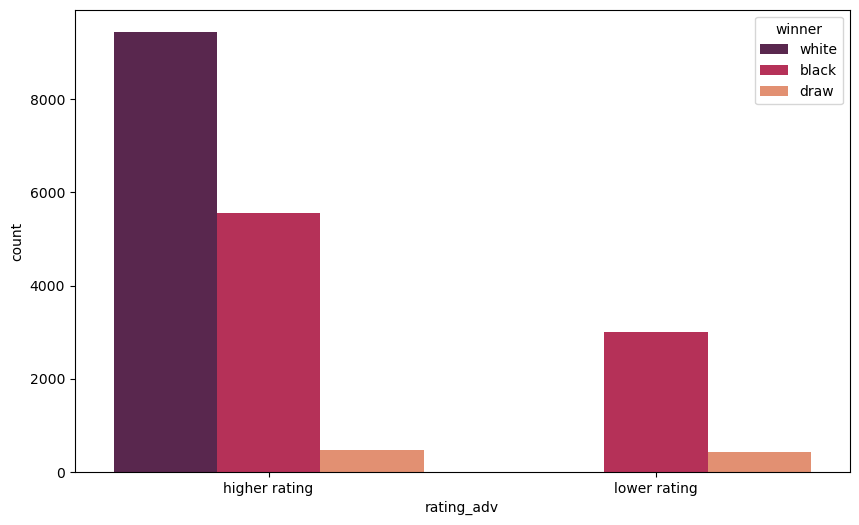

In [436]:
sns.countplot(data=df, x= "rating_adv", hue="winner", palette="rocket")

<Axes: xlabel='winner', ylabel='count'>

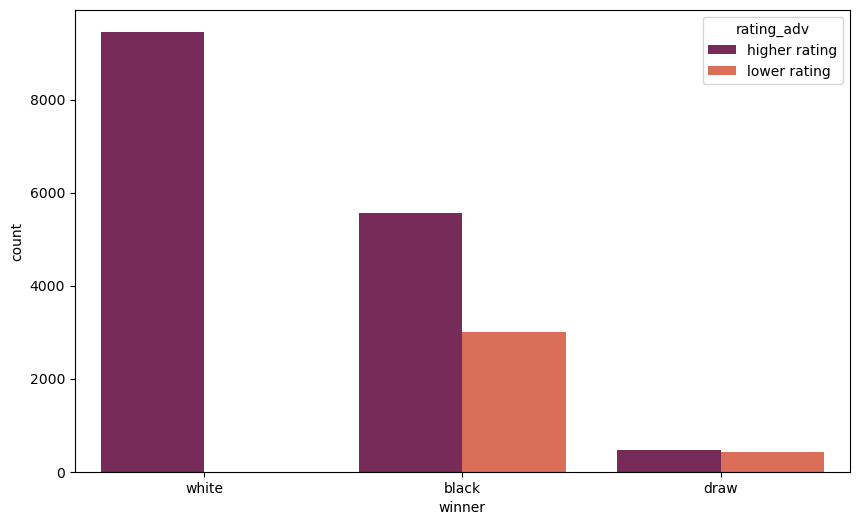

In [437]:
sns.countplot(data=df, x="winner", hue="rating_adv", palette= "rocket")

This shows that there has been no instance when white as had a lower rating and won the game. Thus whenever black has had the rating advantage the game has either been won by black or gone to draw.

([<matplotlib.patches.Wedge at 0x214fbc51600>,
 [Text(-0.8388273183258022, -0.7115959036070567, 'resign'),
  Text(1.0493454103708233, 0.3299609215250928, 'mate'),
  Text(0.01695624672197171, 1.0998693039161989, 'outoftime'),
  Text(-0.4115328180169214, 1.0201180028286196, 'draw')],
 [Text(-0.4575421736322557, -0.38814322014930364, '55.7%'),
  Text(0.5723702238386309, 0.17997868446823242, '31.6%'),
  Text(0.009248861848348205, 0.5999287112270175, '8.2%'),
  Text(-0.224472446191048, 0.5564280015428834, '4.5%')])

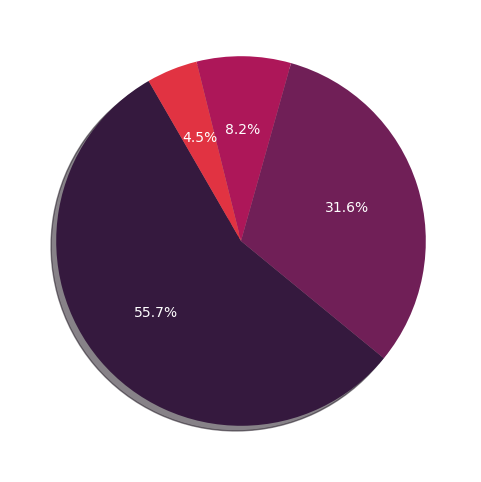

In [476]:
# Calculate the counts for each victory status
victory_counts = df['victory_status'].value_counts()
# Define a custom autopct function with color
def custom_autopct(pct):
    return '{:.1f}%'.format(pct) if pct > 0 else ''
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(victory_counts, labels=victory_counts.index,autopct=custom_autopct, startangle=120,textprops={'color': 'white'}, colors=sns.color_palette("rocket"),shadow= True)

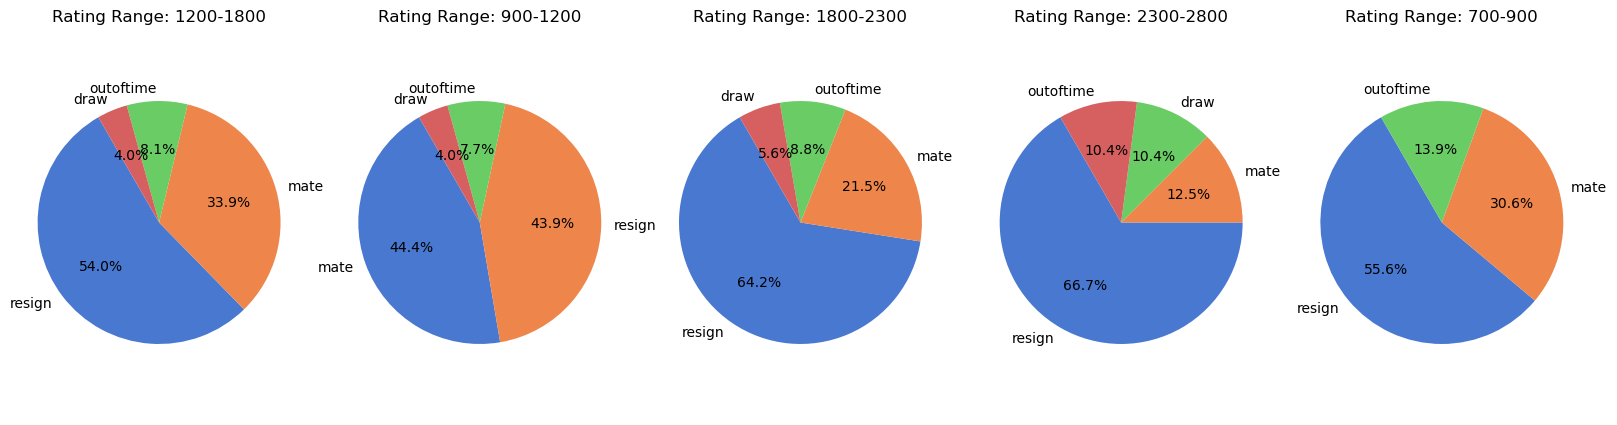

In [464]:
unique_ranges = df['rating_range'].unique()

# Set up subplots
fig, axes = plt.subplots(1, len(unique_ranges), figsize=(20, 5))

# Loop through unique ranges and create pie charts
for i, rating_range in enumerate(unique_ranges):
    ax = axes[i]
    subset_df = df[df['rating_range'] == rating_range]
    victory_counts = subset_df['victory_status'].value_counts()
    ax.pie(victory_counts, labels=victory_counts.index, autopct='%1.1f%%', startangle=120, colors=sns.color_palette("muted"))
    ax.axis('equal')
    ax.set_title(f"Rating Range: {rating_range}")


IN higher rated games(>1800) the number of victories by mate are comparatively less. This is true because the chance of making error is very less in higher rated games and hence player usually resign when they reach disadvantageous position.

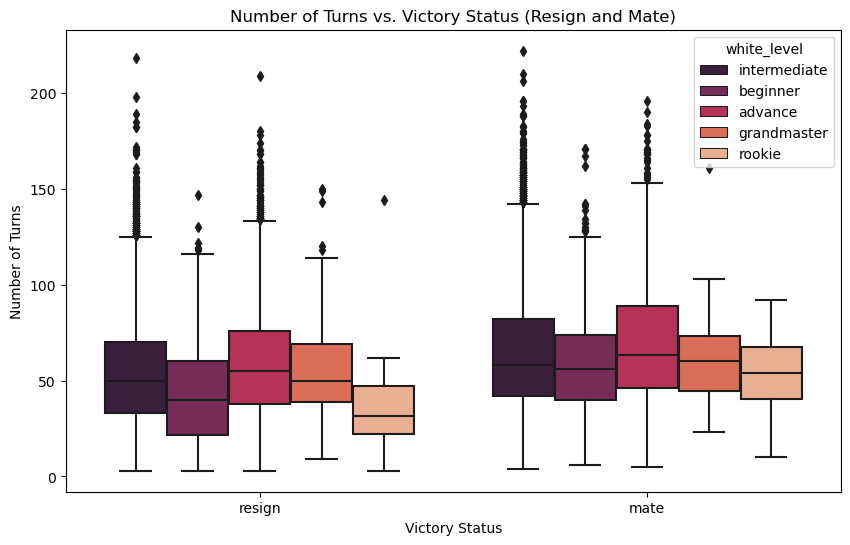

In [471]:
# Filter the DataFrame to include only "resign" and "mate" victory status
filtered_df = df[df['victory_status'].isin(['resign', 'mate'])]

# Create a box plot or violin plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='victory_status', y='turns', data=filtered_df, hue= "white_level", palette="rocket")
plt.title("Number of Turns vs. Victory Status (Resign and Mate)")
plt.xlabel("Victory Status")
plt.ylabel("Number of Turns")
plt.show()